# Installing the `network_spatial_coherence` Package

Before running the example, you need to install the `network_spatial_coherence` package. You can do this using pip. Run the following command in a code cell:



In [1]:
# !pip install git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git
    
# # Use this this if the github has been updated
!pip install --upgrade --force-reinstall git+https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git




  Cloning https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to /tmp/pip-req-build-7yrk0jij
  Running command git clone --filter=blob:none --quiet https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git /tmp/pip-req-build-7yrk0jij
  Resolved https://github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git to commit b4b9cbc645737da24f4f9c1404e81be6d89e9927
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for matplotlib==3.8.3 from https://files.pythonhosted.org/packages/ef/1d/bf1d78126c3d106100232d3a18b7f3732e7dc3b71ee38ab735e4064b19cc/matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for memory_profiler==0.61.0 from https://files.pythonhosted.org/packages/49/26/aaca612a0634ceede20682e692a6c55e35a94c21ba36b807cc40fe910ae1/memory_profiler-0.61.0-py3-n

  Obtaining dependency information for python-dateutil>=2.7 from https://files.pythonhosted.org/packages/ec/57/56b9bcc3c9c6a792fcbaf139543cee77261f3651ca9da0c93f5c1221264b/python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Obtaining dependency information for psutil from https://files.pythonhosted.org/packages/c5/4f/0e22aaa246f96d6ac87fe5ebb9c5a693fbe8877f537a1022527c47ca43c5/psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached csrgraph-0.1.28-py3-none-any.whl
  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/22/40/7d2cce3ad4ad5d02aa68e253e6ea5f0acc381f02f594e235fe00a274faff/gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2

  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/ad/30/2281c062222dc39328843bd1ddd30ff3005ef8e30b2fd09c4d2792766061/fsspec-2024.2.0-py3-none-any.whl.metadata
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.1.105 from https://files.pythonhosted.org/packages/b6/9f/c64c03f49d6fbc56196664d05dba14e3a561038a81a638eeb47f4d4cfd48/nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Obtaining dependency information for nvidia-cuda-runtime-cu12==12.1.105 from https://files.pythonhosted.org/packages/eb/d5/c68b1d2cdfcc59e72e8a5949a37ddb22ae6cade80cd4a57a84d4c8b55472/nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Obtaining dependency i

  Obtaining dependency information for torchvision>=0.8.2 from https://files.pythonhosted.org/packages/6e/c8/cf445dcf86daf1aed298061ad14b8d335fa594596aeaa6b951231328ffd1/torchvision-0.16.2-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchvision-0.16.2-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Obtaining dependency information for torchvision>=0.8.2 from https://files.pythonhosted.org/packages/36/3b/a1d0a681ec3abb1bb8ff92c303ed73c0437050d9ac2b210273dc26f3fd8f/torchvision-0.16.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchvision-0.16.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Obtaining dependency information for torchvision>=0.8.2 from https://files.pythonhosted.org/packages/08/aa/033a0a1bca4a3b8f81f97709024e053da37cf5c970f3dc5d76233c920b99/torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torchvision-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
  Obtaining dependency information for MarkupS

Using cached llvmlite-0.42.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.8 MB)
Using cached MarkupSafe-2.1.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Using cached smart_open-7.0.1-py3-none-any.whl (60 kB)
Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)
Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
Using cached nvidia_nvjitlink_cu12-12.4.99-py3-none-manylinux2014_x86_64.whl (21.1 MB)
Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (80 kB)
  Created wheel for network-spatial-coherence: filename=network_spatial_coherence-0.1.0-py3-none-any.whl size=4668913 sha256=8799fef33735a4279ab4bfec833877f4d3333ce51df665e3fd5b995276e57574
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_54_218/wheels/1e/1c/77/4110af614b994d9493a43c38128eb5e4c32bafb6f1b45f49a3

  Attempting uninstall: filelock
    Found existing installation: filelock 3.13.1
    Uninstalling filelock-3.13.1:
      Successfully uninstalled filelock-3.13.1
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.3.2
    Uninstalling charset-normalizer-3.3.2:
      Successfully uninstalled charset-normalizer-3.3.2
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.1
    Uninstalling smart-open-7.0.1:
      Successfully uninstalled smart-open-7.0

If that doesn't work you might have to authenticate yourself. This usually involves generating a personal access token (PAT) in GitHub with the necessary permissions to clone the repository. 

In [2]:
!pip install git+https://<token>:x-oauth-basic@github.com/DavidFernandezBonet/Spatial_Constant_Analysis.git


/bin/bash: line 1: token: No such file or directory


## Accessing Documentation

To access the documentation for `network_spatial_coherence`, you can use the `access_docs` function. This can be helpful to understand what the package can and cannot do and also to get definitions on every parameter


In [3]:
from network_spatial_coherence.docs_util import access_docs

# To simply open the documentation:
access_docs()


Attempting to copy documentation from: /home/david/anaconda3/lib/python3.11/site-packages/network_spatial_coherence/docs/build/html
Opening documentation in web browser...


## Running a minimum working example

First, let's create the project structure and explore the default configuration options provided by the package. This will create folders to store data (such as edge lists and node positions) and results, such as plots derived from the analysis.
The default configuration is a Python file that can be tuned by you to choose the parameters you want, influencing things like the number of points, the dimension, or the proximity rule chosen. Also you can choose to analyse your own data by setting the "proximity_mode" to experimental, and indicating the name of your "edge_list".


In [4]:
from network_spatial_coherence import structure_and_args
structure_and_args.create_project_structure()
structure_and_args.export_default_config('default_config.py')


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'
Default configuration template written to default_config.py


### Customizing Configuration

You can customize the configuration by editing the default config file exported in the previous step, or directly modify the arguments in the code. Here's how you can modify the arguments directly in the code:


In [5]:
from network_spatial_coherence import nsc_pipeline
import os

# Modify individual parameters
args = structure_and_args.GraphArgs()
args.show_plots = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
args.proximity_mode = 'delaunay_corrected'
args.num_points = 2000
args.verbose = False


/home/david/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Copied example_edge_list.pickle to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/edge_lists/example_edge_list.pickle
Copied dna_cool2.png to /home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence/data/colorcode/dna_cool2.png
Project structure created under '/home/david/PycharmProjects/Spatial_Constant_Analysis/src/network_spatial_coherence'


## Making a Spatial Network
Let's create a proximity network and see how it looks like.

proximity_mode delaunay_corrected
AVERAGE DEGREE DELAUNAY CORRECTED: 5.858
Number Nodes 2000
Average Degree -1
Title Edge List edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv
Unweighted graph
Edge list columns are valid.
(False, False, 1393, 82.47483718176436, 81.74882629107981)
original graph size
Average Degree sparse: 5.858
retrieving edges from edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv


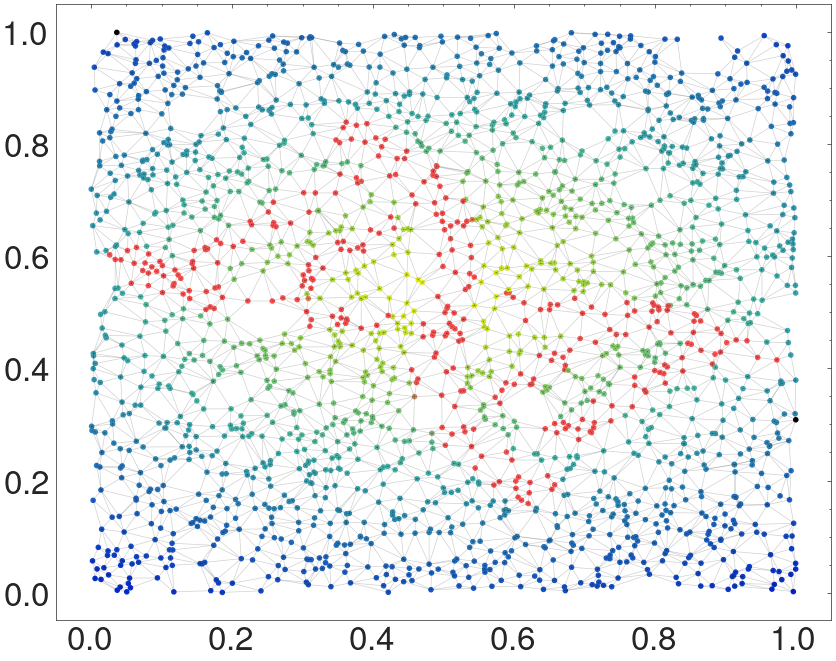

Graph is not an igraph instance. Converting to igraph...
Unweighted graph
Edge list columns are valid.
(False, False, 1393, 82.47483718176436, 81.74882629107981)
average degree igraph 5.858
num points 2000


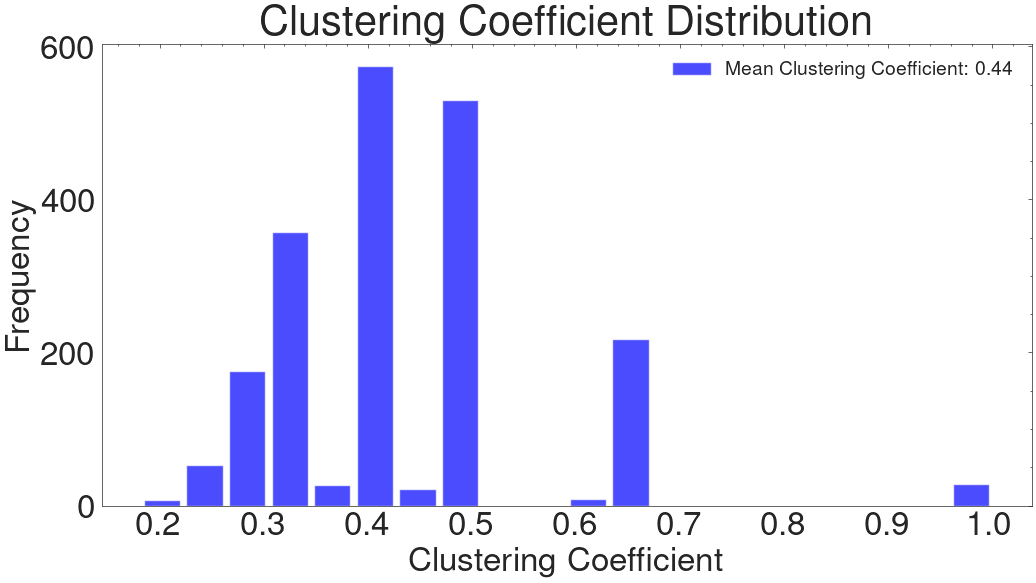

N=2000_dim=2_delaunay_corrected_k=10


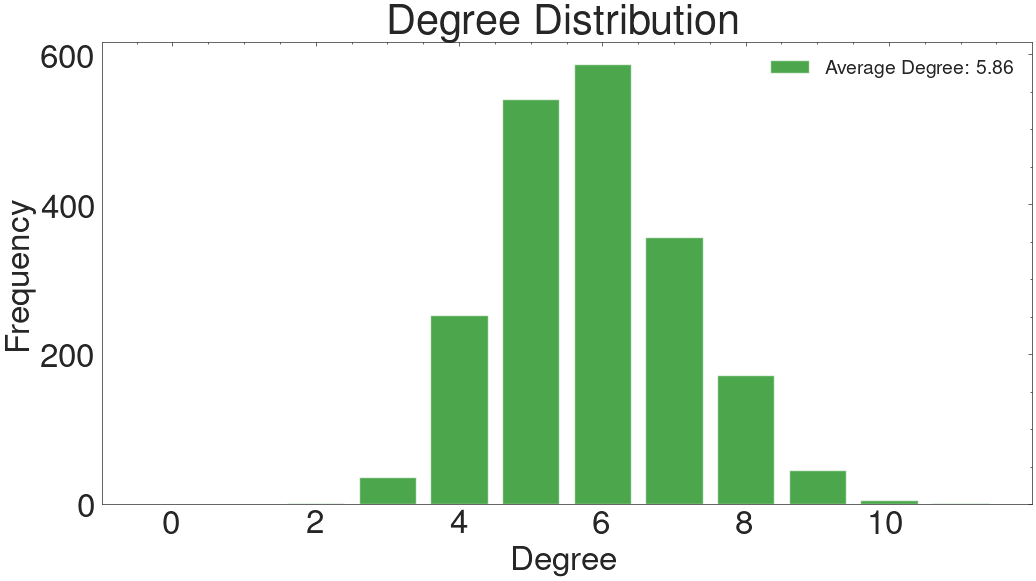

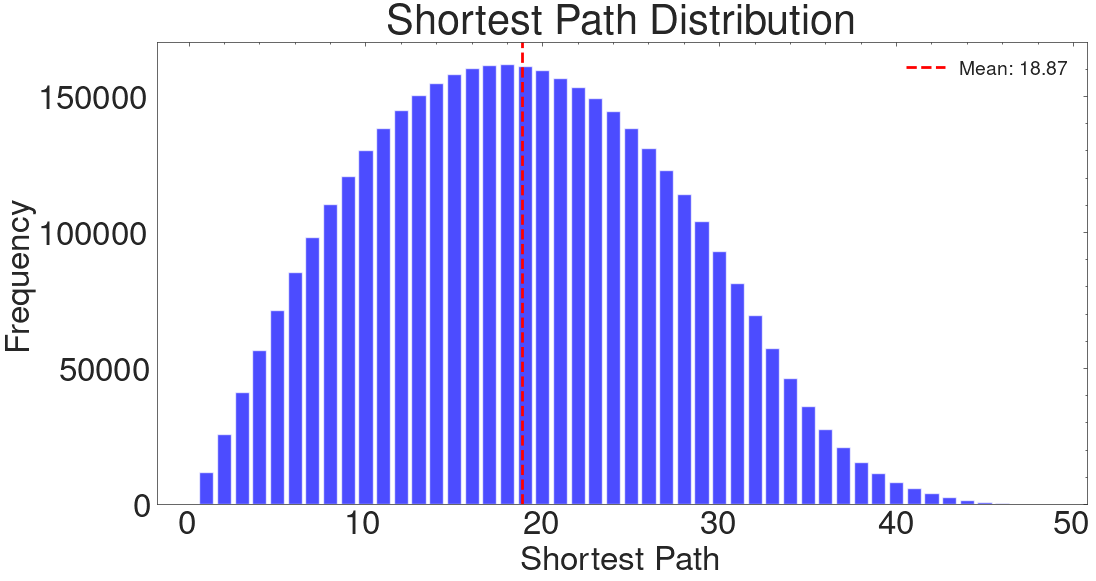

In [6]:
# Load and process the graph
graph, args = nsc_pipeline.load_and_initialize_graph(args=args)
# Plot the original image and the network properties
args.plot_original_image = True
args.plot_graph_properties = True
args.colorfile = 'dna_cool2.png'
nsc_pipeline.plot_and_analyze_graph(graph, args)

# Spatial Coherence
We can see how spatially coherent our network is by taking a look at the spatial constant, inferring the dimension of the network (it should be similar to the Euclidean dimension) and analyzing the Gram matrix of the network.
## 1 - Spatial Constant

200
Graph is not an igraph instance. Converting to igraph...


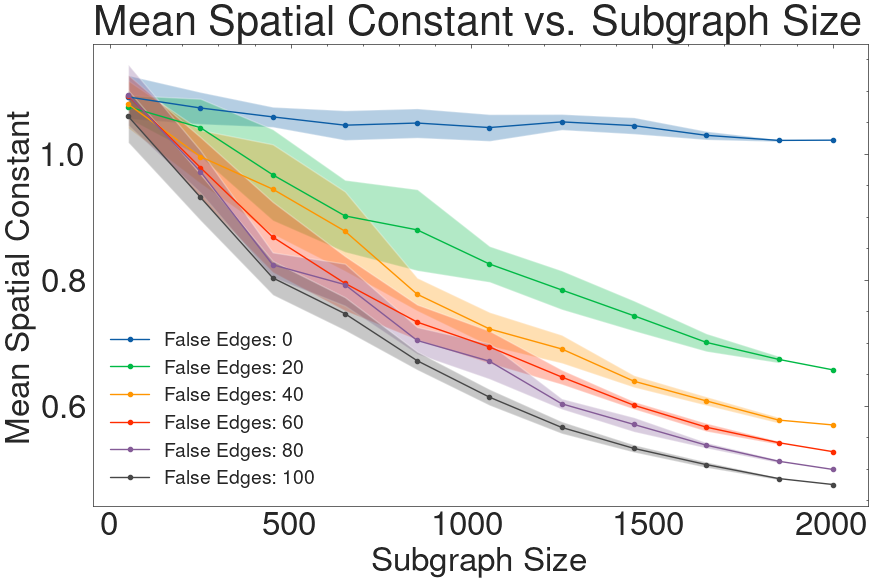

In [7]:
nsc_pipeline.compute_shortest_paths(graph, args)
import matplotlib.pyplot as plt
plt.close('all')
nsc_pipeline.spatial_constant_analysis(graph, args)

## 2 - Network Dimension

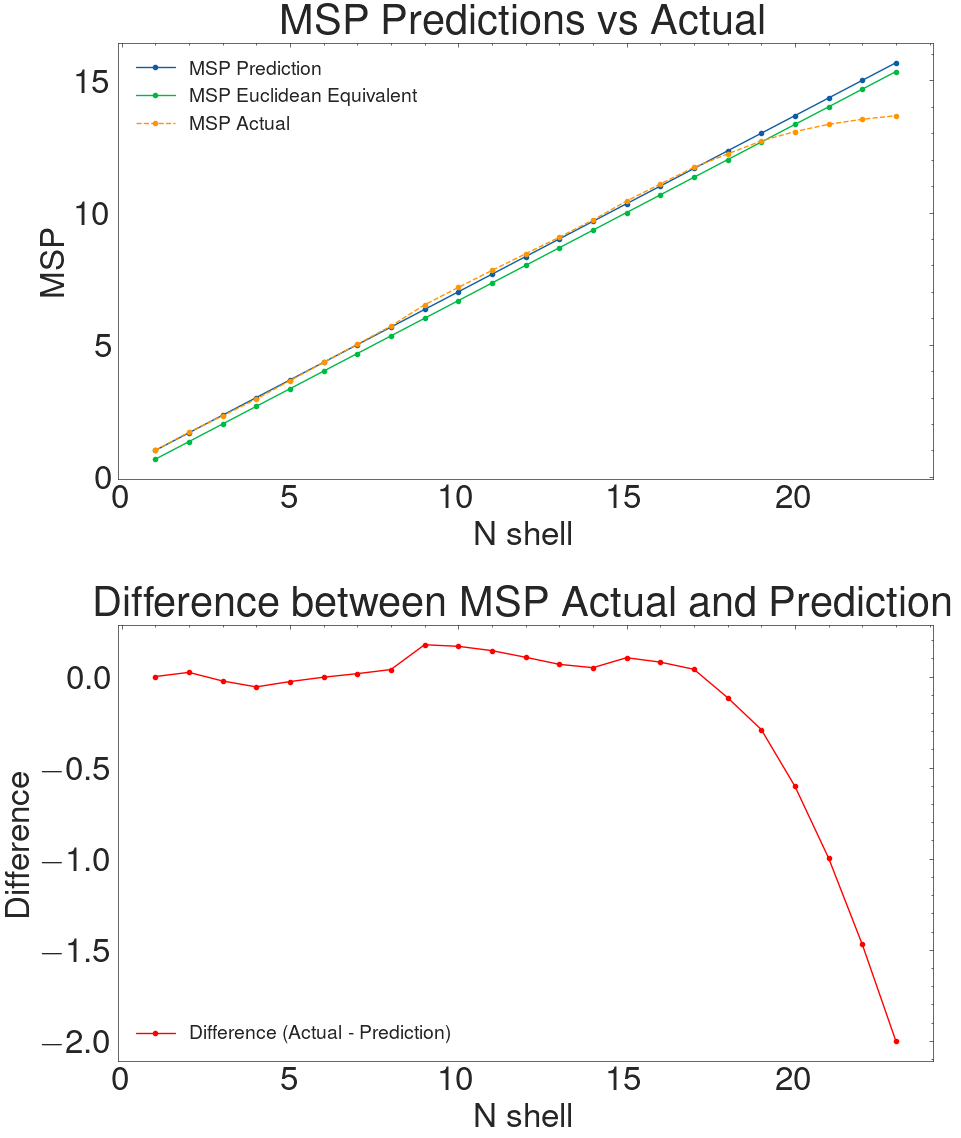

Surface Counts [  9  20  26  33  45  55  65  76 106 101 108 114 121 133 160 153 157 131
 126  89  65  43  28  13   8   9   5   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
Volume Counts [   9   29   55   88  133  188  253  329  435  536  644  758  879 1012
 1172 1325 1482 1613 1739 1828 1893 1936 1964 1977 1985 1994 1999 1999
 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 1999
 1999 1999 1999 1999 1999 1999]


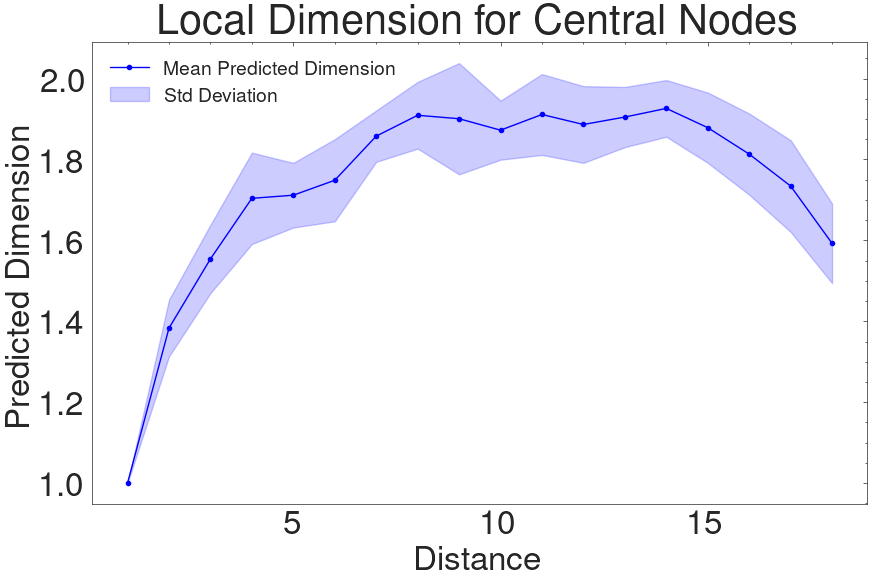

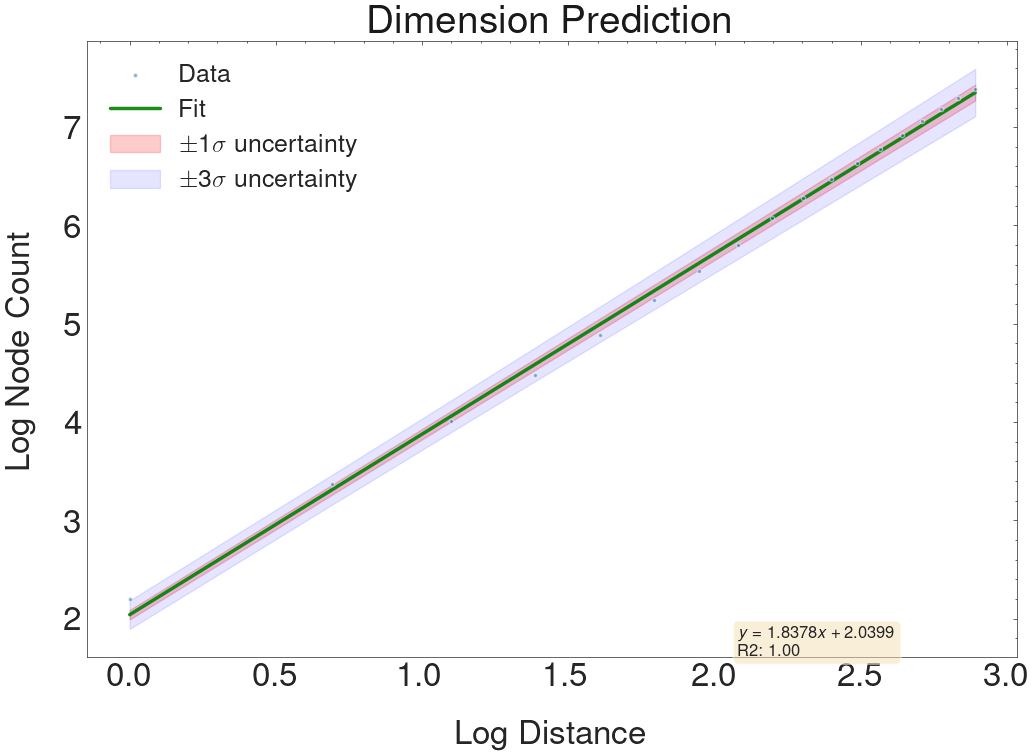

RESULTS DIMENSION PREDICTION {'predicted_dimension': 1.957529593448196, 'std_predicted_dimension': 0.0031810037535544332}


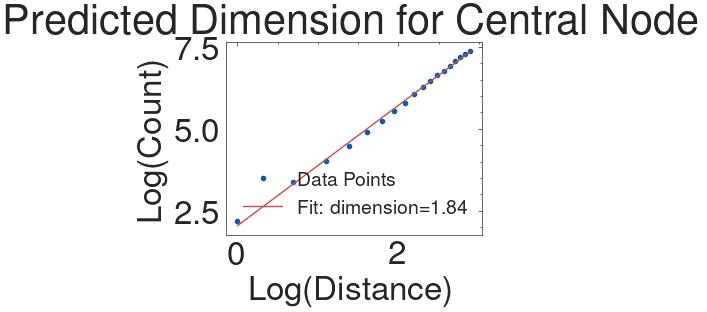

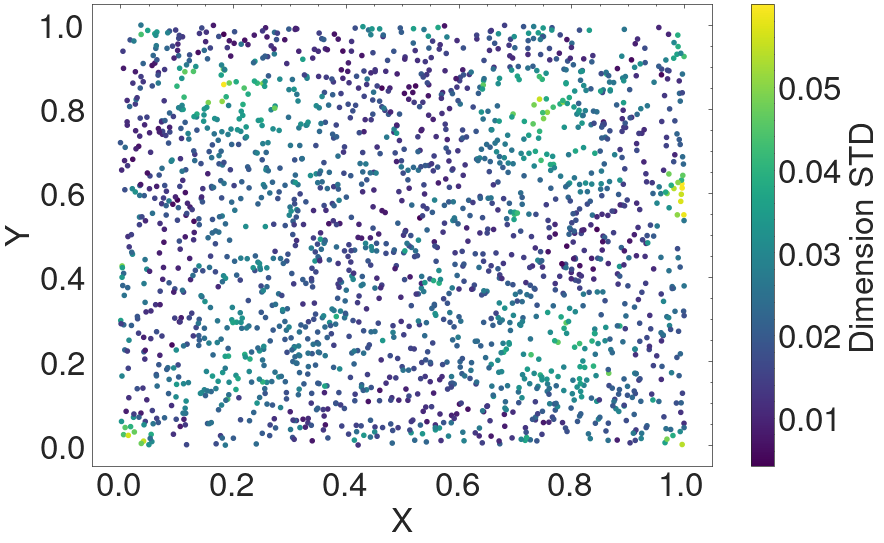

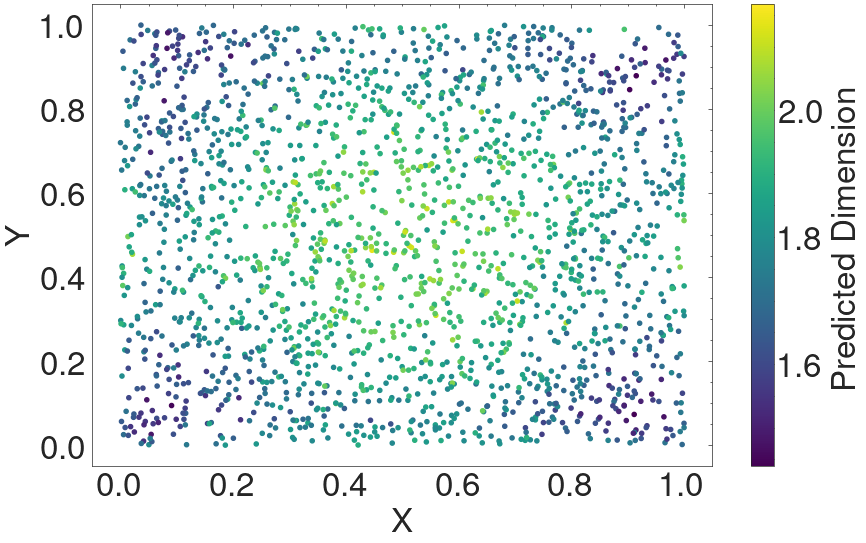

In [8]:
nsc_pipeline.network_dimension(args)

## 3- Gram Matrix Analysis

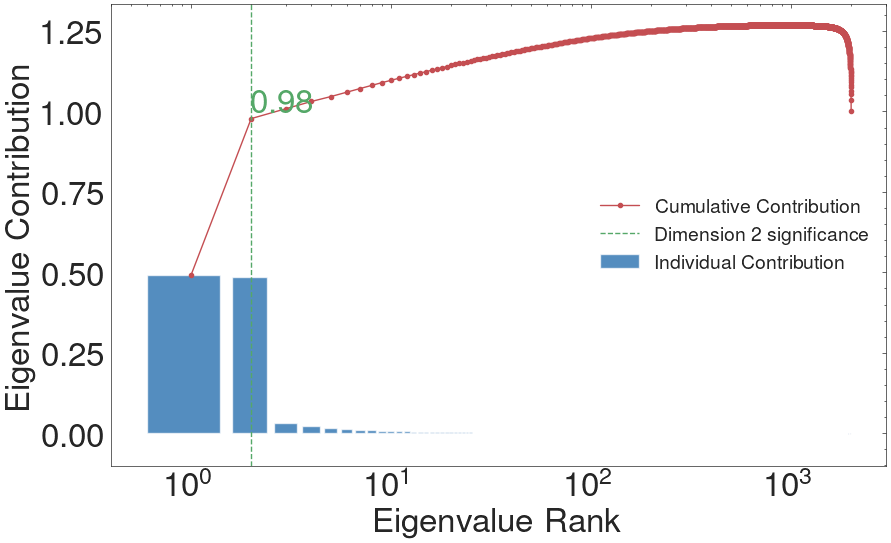

Proportion of the sum of negative eigenvalues to positive eigenvalues: 0.2603
Spectral gap score: 0.9363175212764938


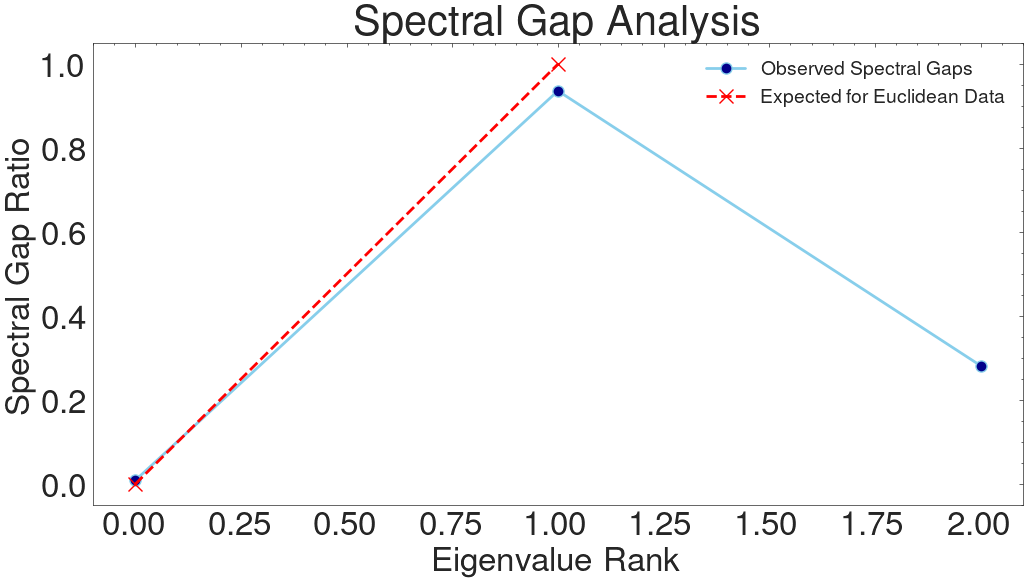

First d values contribution 0.9778572846902875


In [9]:
nsc_pipeline.rank_matrix_analysis(args)

# Network Reconstruction
If we find that the network is spatially coherent, we can reconstruct the graph with guarantees!

running reconstruction...
reconstruction mode: landmark_isomap


/home/david/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


retrieving edges from edge_list_N=2000_dim=2_delaunay_corrected_k=10.csv


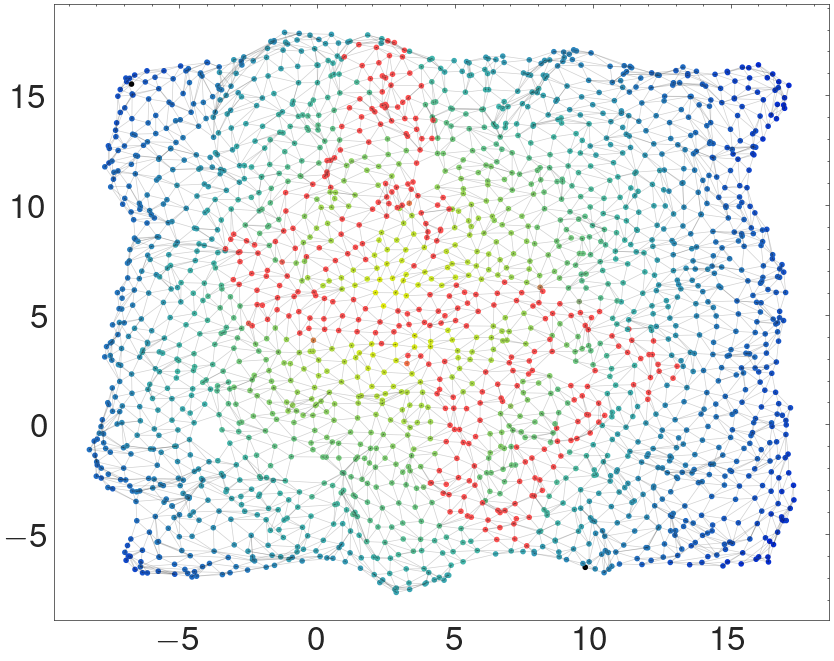

original neighbors [1208  948 1743 1165  111  656   58 1538  647 1487  372  229 1182  354
  540]
reconstructed neighbors [1165 1208  948  111 1538  935  229 1743  656 1373  115   58  647  372
  640]
{'KNN': 0.7126333333333272, 'CPD': 0.9851453633360705}
{'GTA_KNN': 0.6519504689754684, 'GTA_CPD': 0.9886856772637337}


In [10]:
args.reconstruct = True
args.reconstruction_mode = 'landmark_isomap'
nsc_pipeline.reconstruct_graph(graph, args)